In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ct_name='Знач. наб. SNP' # clumps total
cc_name='СС (Доля наборов, содержащих причинные SNP)'
sf_name='SF (Доля найденных причинных SNP)'

In [3]:
data = pd.read_csv("data/chr_ph_sperm_compare_results.tsv", sep='\t')
data['params'] = '('+data.m_beta.astype(str) + ", " + data.sd_beta.astype(str) + ", " + data.gen_var.astype(str) + ", " + data.h2s.astype(str) + ")"
data

,K,m_beta,sd_beta,gen_var,h2s,clumps_total,clumps_causal,clumps_not_causal,causal_found,causal_not_found,params
0,10,0.01,0.001,0.05,0.1,5,1.00000,0.00000,0.50000,0.50000,"(0.01, 0.001, 0.05, 0.1)"
1,30,0.01,0.001,0.05,0.1,4,0.75000,0.25000,0.10000,0.90000,"(0.01, 0.001, 0.05, 0.1)"
2,50,0.01,0.001,0.05,0.1,1,1.00000,0.00000,0.02000,0.98000,"(0.01, 0.001, 0.05, 0.1)"
3,10,0.01,0.001,0.05,0.5,3,0.66667,0.33333,0.20000,0.80000,"(0.01, 0.001, 0.05, 0.5)"
4,30,0.01,0.001,0.05,0.5,2,0.50000,0.50000,0.03333,0.96667,"(0.01, 0.001, 0.05, 0.5)"
...,...,...,...,...,...,...,...,...,...,...,...
187,30,0.50,0.300,0.50,0.1,31,0.70968,0.29032,0.73333,0.26667,"(0.5, 0.3, 0.5, 0.1)"
188,50,0.50,0.300,0.50,0.1,29,0.79310,0.20690,0.46000,0.54000,"(0.5, 0.3, 0.5, 0.1)"
189,10,0.50,0.300,0.50,0.5,72,0.13889,0.86111,1.00000,0.00000,"(0.5, 0.3, 0.5, 0.5)"
190,30,0.50,0.300,0.50,0.5,25,0.72000,0.28000,0.60000,0.40000,"(0.5, 0.3, 0.5, 0.5)"


## Clumps causal - causal found

Let: Clumps causal = CC, Causal found = SF

In [4]:
d = data.rename(columns={'clumps_causal':"CC", "causal_found": "SF", 'clumps_total': ct_name})
# d = d[d.clumps_total != 0]
darr = d[((d.SF>0.9) & (d.CC>0.4)) |
 ((d.SF>0.75) & (d.CC>0.6))  |
 ((d.SF>0.7) & (d.CC>0.75))  |
 ((d.SF>0.5) & (d.CC>0.9))  |
 ((d.SF>0.4) & (d.CC>0.95))  ].copy(deep=True)
darr['x']=0
darr['y']=0
darr

,K,m_beta,sd_beta,gen_var,h2s,Знач. наб. SNP,CC,clumps_not_causal,SF,causal_not_found,params,x,y
0,10,0.01,0.001,0.05,0.1,5,1.00000,0.00000,0.50000,0.50000,"(0.01, 0.001, 0.05, 0.1)",0,0
22,30,0.01,0.005,0.50,0.5,18,0.94444,0.05556,0.56667,0.43333,"(0.01, 0.005, 0.5, 0.5)",0,0
78,10,0.10,0.050,0.50,0.1,13,0.61538,0.38462,0.80000,0.20000,"(0.1, 0.05, 0.5, 0.1)",0,0
104,50,0.20,0.050,0.50,0.1,25,0.96000,0.04000,0.48000,0.52000,"(0.2, 0.05, 0.5, 0.1)",0,0
111,10,0.20,0.100,0.05,0.5,5,1.00000,0.00000,0.50000,0.50000,"(0.2, 0.1, 0.05, 0.5)",0,0
138,10,0.30,0.050,0.50,0.1,23,0.43478,0.56522,1.00000,0.00000,"(0.3, 0.05, 0.5, 0.1)",0,0
139,30,0.30,0.050,0.50,0.1,28,0.78571,0.21429,0.73333,0.26667,"(0.3, 0.05, 0.5, 0.1)",0,0
147,10,0.30,0.100,0.05,0.5,5,1.00000,0.00000,0.50000,0.50000,"(0.3, 0.1, 0.05, 0.5)",0,0
155,50,0.30,0.100,0.50,0.5,29,0.93103,0.06897,0.54000,0.46000,"(0.3, 0.1, 0.5, 0.5)",0,0
178,30,0.50,0.100,0.50,0.5,25,0.88000,0.12000,0.73333,0.26667,"(0.5, 0.1, 0.5, 0.5)",0,0


In [5]:
darr.loc[139,'y']=0.025
darr.loc[139,'x']=-0.015
darr.loc[111,'y']=0.02
darr.loc[147,'y']=-0.003
darr.loc[0,'y']=-0.025
darr.loc[104,'y']=-0.03
darr.loc[104,'x']=-0.01
darr.sort_values(by=['CC', 'SF'], ascending=[False, False], inplace=True)
darr

,K,m_beta,sd_beta,gen_var,h2s,Знач. наб. SNP,CC,clumps_not_causal,SF,causal_not_found,params,x,y
0,10,0.01,0.001,0.05,0.1,5,1.00000,0.00000,0.50000,0.50000,"(0.01, 0.001, 0.05, 0.1)",0.000,-0.025
111,10,0.20,0.100,0.05,0.5,5,1.00000,0.00000,0.50000,0.50000,"(0.2, 0.1, 0.05, 0.5)",0.000,0.020
147,10,0.30,0.100,0.05,0.5,5,1.00000,0.00000,0.50000,0.50000,"(0.3, 0.1, 0.05, 0.5)",0.000,-0.003
104,50,0.20,0.050,0.50,0.1,25,0.96000,0.04000,0.48000,0.52000,"(0.2, 0.05, 0.5, 0.1)",-0.010,-0.030
22,30,0.01,0.005,0.50,0.5,18,0.94444,0.05556,0.56667,0.43333,"(0.01, 0.005, 0.5, 0.5)",0.000,0.000
155,50,0.30,0.100,0.50,0.5,29,0.93103,0.06897,0.54000,0.46000,"(0.3, 0.1, 0.5, 0.5)",0.000,0.000
178,30,0.50,0.100,0.50,0.5,25,0.88000,0.12000,0.73333,0.26667,"(0.5, 0.1, 0.5, 0.5)",0.000,0.000
139,30,0.30,0.050,0.50,0.1,28,0.78571,0.21429,0.73333,0.26667,"(0.3, 0.05, 0.5, 0.1)",-0.015,0.025
78,10,0.10,0.050,0.50,0.1,13,0.61538,0.38462,0.80000,0.20000,"(0.1, 0.05, 0.5, 0.1)",0.000,0.000
138,10,0.30,0.050,0.50,0.1,23,0.43478,0.56522,1.00000,0.00000,"(0.3, 0.05, 0.5, 0.1)",0.000,0.000


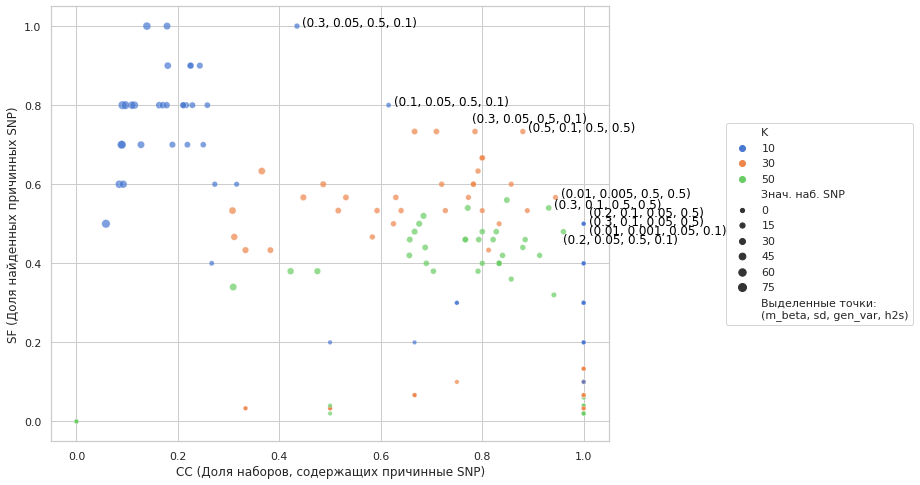

In [6]:
sns.set()
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(d, 
                     x='CC', 
                     y='SF', 
                     hue='K', 
                     size=ct_name, 
                     palette="muted",  
                     alpha=.7,)
ax.set(xlabel=cc_name, ylabel=sf_name)

plt.plot([], [], ' ', label="Выделенные точки: \n(m_beta, sd, gen_var, h2s)")

for key, value in darr.iterrows():
    ax.text(value['CC']+0.01+value['x'], 
            value['SF']+value['y'], 
            value['params'], 
            horizontalalignment='left', 
            size='medium', 
            color='black')

plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

## Params -- CC/SF

In [7]:
columns = ["m_beta", "sd_beta", "gen_var", "h2s"]

<Figure size 1080x720 with 0 Axes>

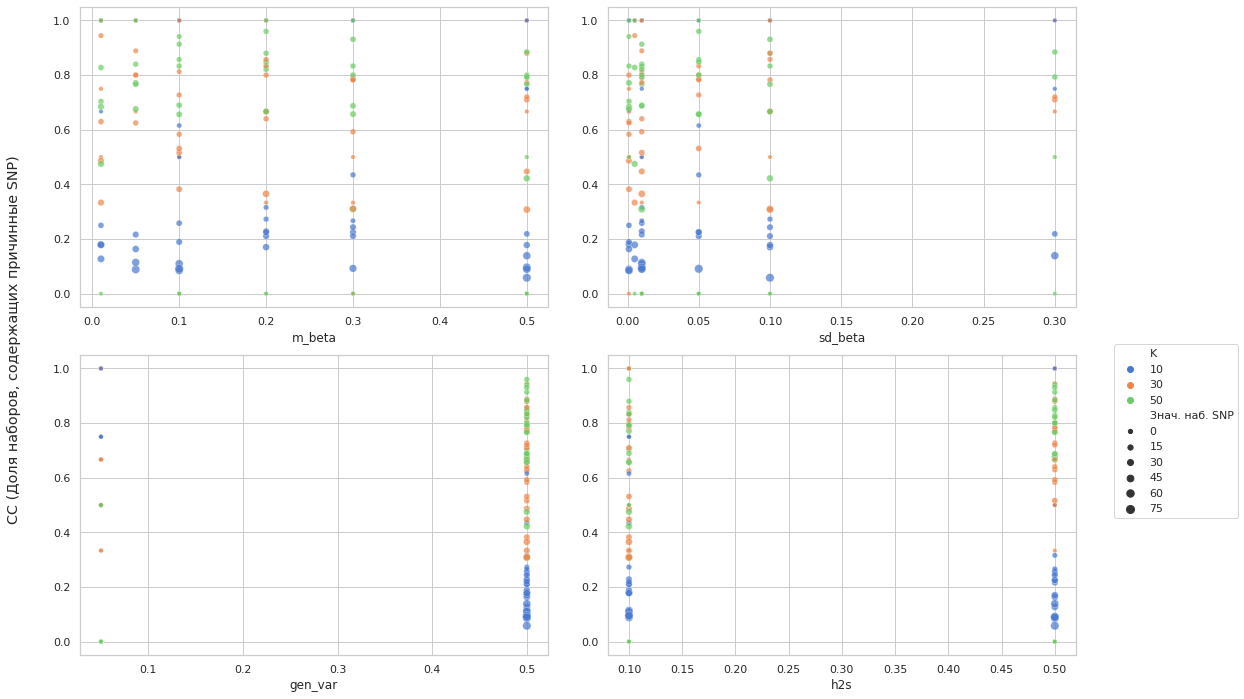

In [8]:
sns.set(rc={"figure.figsize": (15, 10)})
sns.set_theme(style="whitegrid")
# get legend
ax = sns.scatterplot(d, 
                     x=columns[0], 
                     y='CC', 
                     hue='K', 
                         palette="muted",
                     size=ct_name)
handles, labels = ax.get_legend_handles_labels()
plt.clf()
#draw
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(pad=2)
for i, c in enumerate(columns):
    row = i // 2
    col = i % 2
    ax = sns.scatterplot(d, 
                         x=c, 
                         y='CC', 
                         hue='K', 
                         size=ct_name, 
                         palette="muted",  
                         alpha=.7,
                         ax=axs[row][col], 
                         legend=False)
    ax.set(ylabel='', xlabel=c)
#     ax.title.set_text(c)
    
fig.supylabel(cc_name, y=0.5, x=-0.02)
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

<Figure size 1080x720 with 0 Axes>

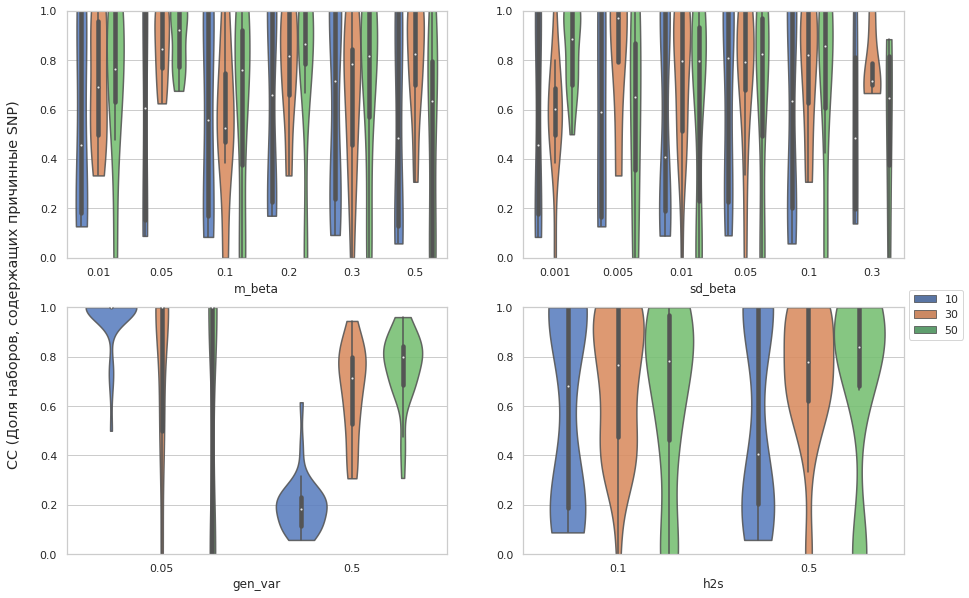

In [15]:
sns.set(rc={"figure.figsize": (15, 10)})
sns.set_theme(style="whitegrid")
# get legend
ax = sns.violinplot(d, 
                    x=c, 
                    y='CC', 
                    hue='K')
handles, labels = ax.get_legend_handles_labels()
plt.clf()
# draw
fig, axs = plt.subplots(nrows=2, ncols=2)
for i, c in enumerate(columns):
    row = i // 2
    col = i % 2
    ax = sns.violinplot(d, 
                        x=c, 
                        y='CC', 
                        hue='K', 
                        palette="muted",
                        alpha=.7,
                        ax=axs[row][col], 
                        legend=False,
                       cut=0)
    plt.setp(ax.collections, alpha=.88)
    ax.legend_.remove()
    ax.set(ylabel='', xlabel=c)
    ax.set(ylim=(0, 1))
fig.supylabel(cc_name, y=0.5, x=0.07)
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.9, 0.5))
plt.show()

<Figure size 1080x720 with 0 Axes>

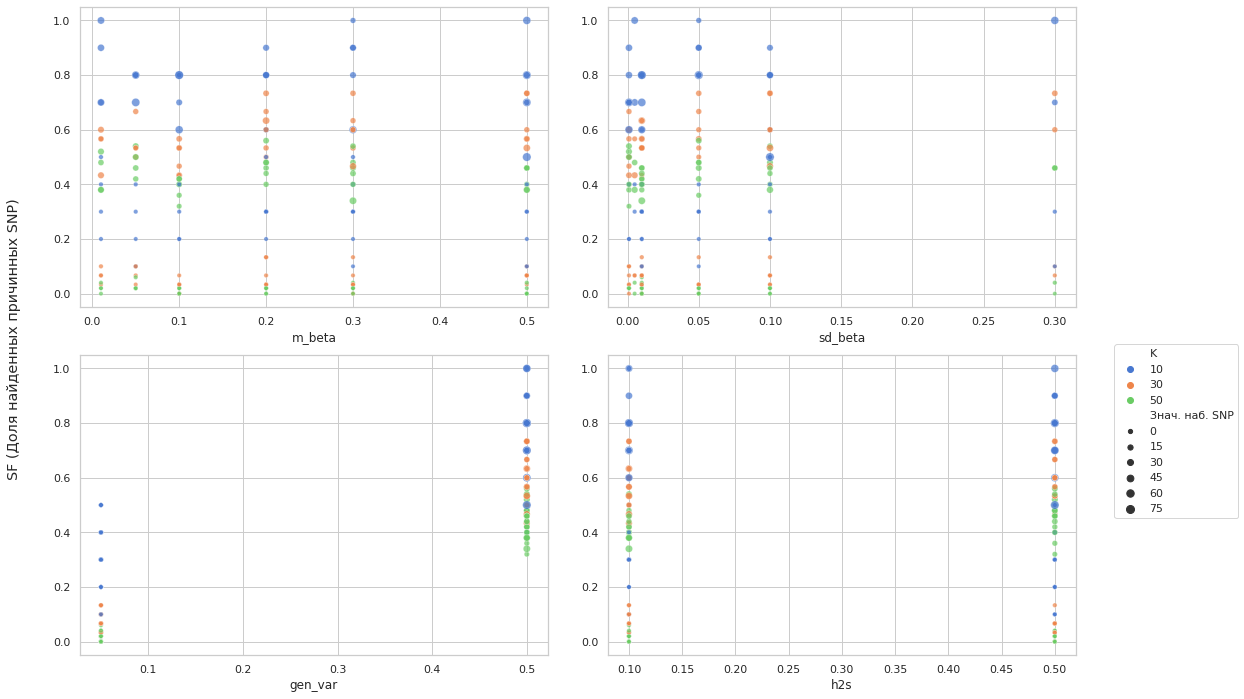

In [10]:
sns.set(rc={"figure.figsize": (15, 10)})
sns.set_theme(style="whitegrid")
# get legend
ax = sns.scatterplot(d, 
                     x=columns[0], 
                     y='SF', 
                     hue='K', 
                         palette="muted",
                     size=ct_name)
handles, labels = ax.get_legend_handles_labels()
plt.clf()
#draw
fig, axs = plt.subplots(nrows=2, ncols=2)
fig.tight_layout(pad=2)
for i, c in enumerate(columns):
    row = i // 2
    col = i % 2
    ax = sns.scatterplot(d, 
                         x=c, 
                         y='SF', 
                         hue='K', 
                         size=ct_name, 
                         palette="muted",  
                         alpha=.7,
                         ax=axs[row][col], 
                         legend=False)
    ax.set(ylabel='', xlabel=c)
#     ax.title.set_text(c)
    
fig.supylabel(sf_name, y=0.5, x=-0.02)
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

<Figure size 1080x720 with 0 Axes>

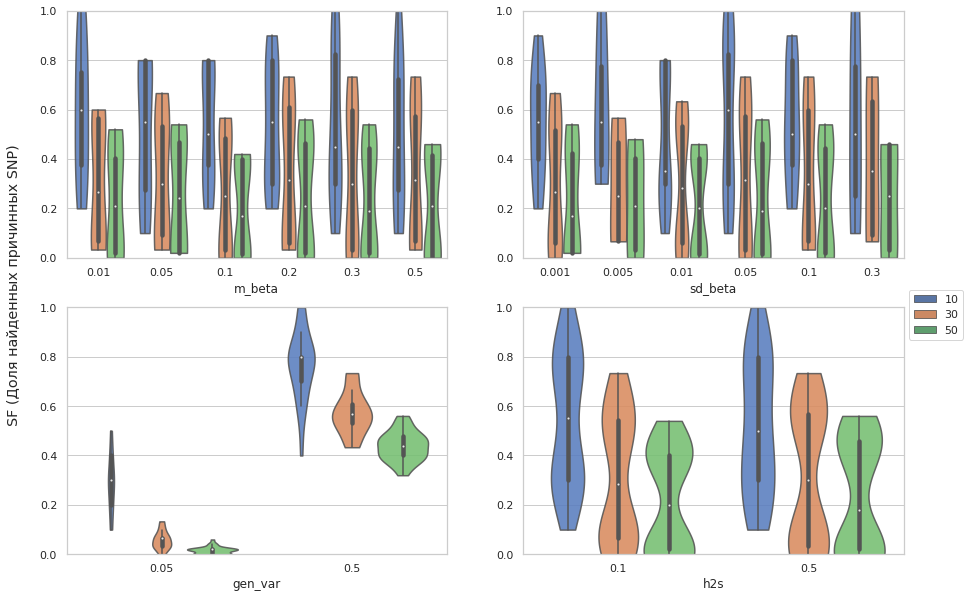

In [16]:
sns.set(rc={"figure.figsize": (15, 10)})
sns.set_theme(style="whitegrid")
# get legend
ax = sns.violinplot(d, 
                    x=c, 
                    y='SF', 
                    hue='K')
handles, labels = ax.get_legend_handles_labels()
plt.clf()
# draw
fig, axs = plt.subplots(nrows=2, ncols=2)
for i, c in enumerate(columns):
    row = i // 2
    col = i % 2
    ax = sns.violinplot(d, 
                        x=c, 
                        y='SF', 
                        hue='K', 
                        palette="muted",
                        alpha=.7,
                        ax=axs[row][col], 
                        legend=False,
                       cut=0)
    plt.setp(ax.collections, alpha=.88)
    ax.legend_.remove()
    ax.set(ylabel='', xlabel=c)
    ax.set(ylim=(0, 1))
fig.supylabel(sf_name, y=0.5, x=0.07)
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.9, 0.5))
plt.show()